<a href="https://colab.research.google.com/github/azamali992/prodigy-internship-tasks/blob/main/kMean_clustering_algo_task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#

In [10]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:

print(data['Gender'].value_counts())


Gender
Female    112
Male       88
Name: count, dtype: int64


In [11]:
data.replace({'Gender':{'Female':0,'Male':1}},inplace=True)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [26]:
class KMeansScratch:
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.centroids = None

    def fit(self, X):
        n_samples, n_features = X.shape

        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            clusters = self._assign_clusters(X)

            new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.k)])

            if np.all(np.abs(self.centroids - new_centroids) <= self.tolerance):
                break

            self.centroids = new_centroids

        return clusters

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._assign_clusters(X)



In [41]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values


In [48]:
kmeans = KMeansScratch(k=2)
clusters = kmeans.fit(X)


In [49]:
data['Cluster'] = clusters

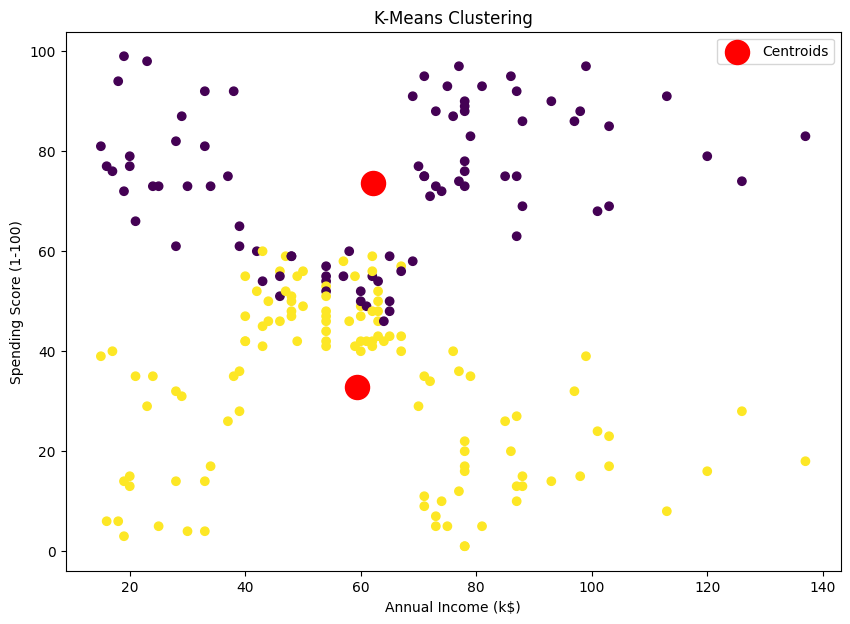

In [50]:
plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.centroids[:, 1], kmeans.centroids[:, 2], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()